In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/Pre_processed_DoS (1).csv")

In [ ]:
data.shape

(214475, 68)

In [ ]:
x = data.iloc[:,:-1]

In [ ]:
y=data['Label']
y

0         0
1         0
2         1
3         0
4         1
         ..
214470    0
214471    0
214472    0
214473    0
214474    0
Name: Label, Length: 214475, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
param_dist = {'n_estimators': randint(50,500), 'max_depth': randint(1,20)}



# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(RF,param_distributions = param_dist, n_iter=5, cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a2f07b91f30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a2f08663700>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 242}


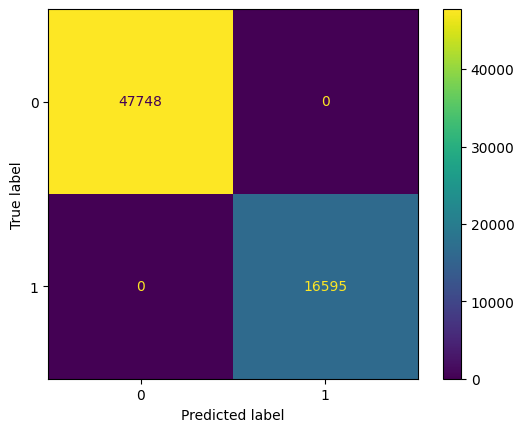

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(x_test)
y_pred_train = best_rf.predict(x_train)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
y_pred = RF.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1_score",f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1_score 1.0


Decision Tree


In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)



In [ ]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_pred, y_test)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1_score",f1)

Accuracy: 0.9958348227468411
Precision: 1.0
Recall: 0.9838505573968063
f1_score 0.9918595468076058


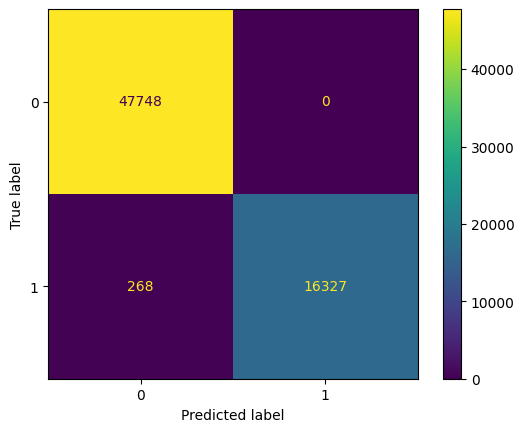

In [ ]:
# Generate predictions
y_pred = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#### Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
g = GradientBoostingClassifier()
g.fit(x_train, y_train)


GradientBoostingClassifier()

In [ ]:
y_pred = g.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_pred, y_test)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1_Score",f1)


Accuracy: 0.999968916587663
Precision: 1.0
Recall: 0.999879481771618
f1_Score 0.9999397372544293


In [ ]:
# Predict Output
predicted = g.predict(x_test)


print("Predicted Value:", predicted[2])

Predicted Value: 0


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train, y_train)



GaussianNB()

In [ ]:

y_pred = model.predict(x_test)


accuray = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)

print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9286014018618964
Precision: 0.7831893907216009
Recall: 1.0


In [ ]:
# Predict Output
predicted = model.predict(x_test)
# print(y_test)
# print(predicted[])
if(predicted[7]==1):
  print("Dos Attack")
else:
  print("NO Attack")

# print("Predicted Value:", predicted[10])

NameError: ignored